## Model Definition and Model Training (Deep Neural Network)

**This Notebook is for Non-Normalised Dataset**

## Data Description

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Date |Date of incident	|
|Province/State |If there is a breakdown in states	|
|Lat |Latitude	|
|Lon |Longitude	|
|Confirmed |Confirmed cases	|
|Recovered |Recovered cases	|
|Deaths |Death cases	|
|Active |Active cases	|

## Summary and Results

| Algorithm      | MSE | RMSE | R2 |
|----------------|-----|------|----|
|Deep Neural Network | 2.423  | 1.556 |  0.191 |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
#sets the default autosave frequency in seconds
%autosave 60

# from sklearn.neural_network import MLPClassifier, MLPRegressor
# from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, save_model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from tensorflow.keras.optimizers import Adam

#For ANN and DNN
import keras
from keras.models import save_model, load_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.regularizers import l1,l2,l1_l2

#For Tuning
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau, TensorBoard


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)
tf.random.set_seed(0)

Autosaving every 60 seconds


## Data Exploration

In [2]:
df = pd.read_csv("traincovid.csv")

In [3]:
df

,Month,Day,ConfirmDiff,RecoverDiff,DeathsDiff
0,1,22,0.0,0.0,0.0
1,1,23,0.0,0.0,0.0
2,1,24,0.0,0.0,0.0
3,1,25,3.0,0.0,0.0
4,1,26,1.0,0.0,0.0
...,...,...,...,...,...
304,11,21,1041.0,1405.0,3.0
305,11,22,1096.0,1104.0,3.0
306,11,23,1884.0,883.0,2.0
307,11,24,2188.0,1673.0,4.0


In [4]:
df.isnull().sum()

Month          0
Day            0
ConfirmDiff    0
RecoverDiff    0
DeathsDiff     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        309 non-null    int64  
 1   Day          309 non-null    int64  
 2   ConfirmDiff  309 non-null    float64
 3   RecoverDiff  309 non-null    float64
 4   DeathsDiff   309 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 12.2 KB


In [6]:
df.describe(include='all')

,Month,Day,ConfirmDiff,RecoverDiff,DeathsDiff
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,6.265372,15.857605,193.582524,150.488673,1.116505
std,2.943317,8.814048,359.375952,306.753450,1.988445
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,7.000000,6.000000,0.000000
50%,6.000000,16.000000,33.000000,28.000000,0.000000
75%,9.000000,23.000000,150.000000,96.000000,1.000000
max,11.000000,31.000000,2188.000000,2348.000000,12.000000


In [7]:
df.shape

(309, 5)

In [8]:
df.columns

Index(['Month', 'Day', 'ConfirmDiff', 'RecoverDiff', 'DeathsDiff'], dtype='object')

## Data Visualization

### Univariate Data Exploration

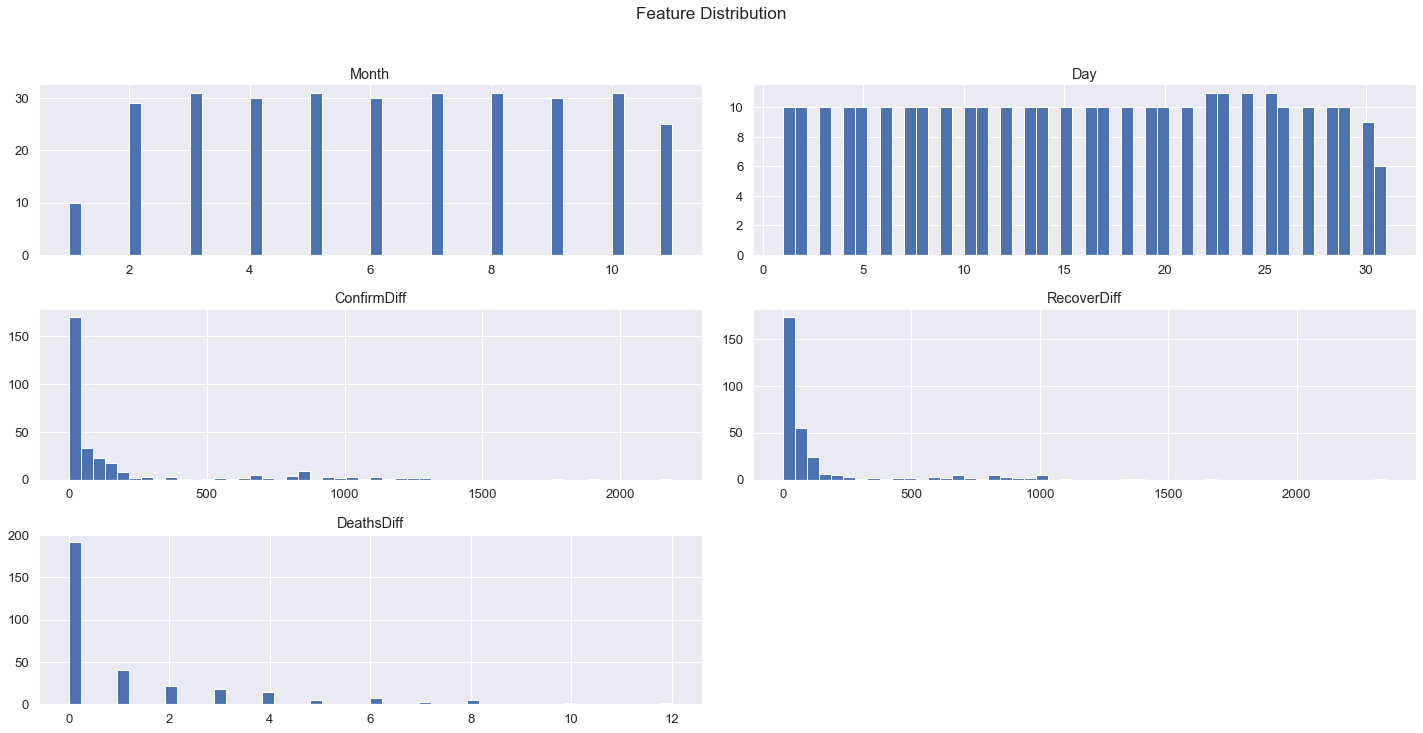

In [9]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

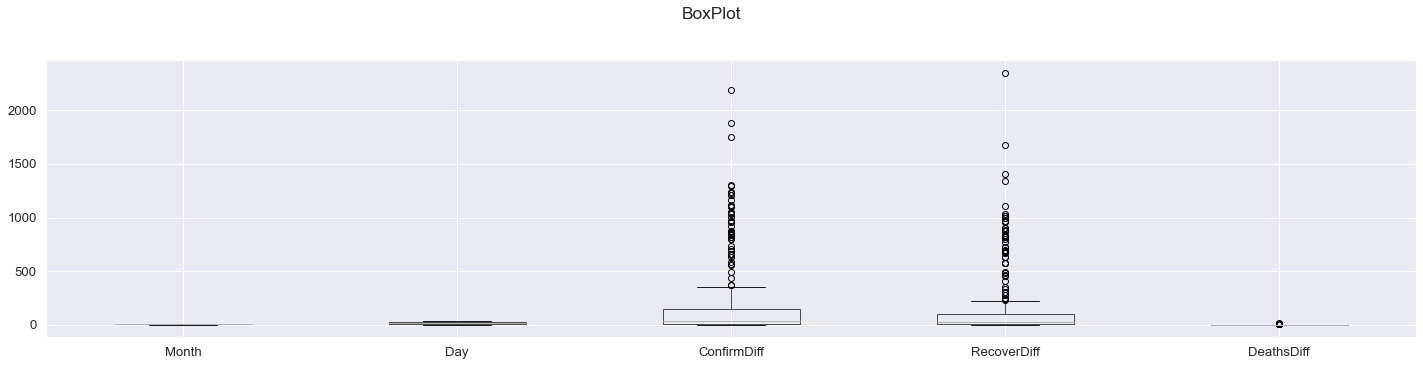

In [10]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

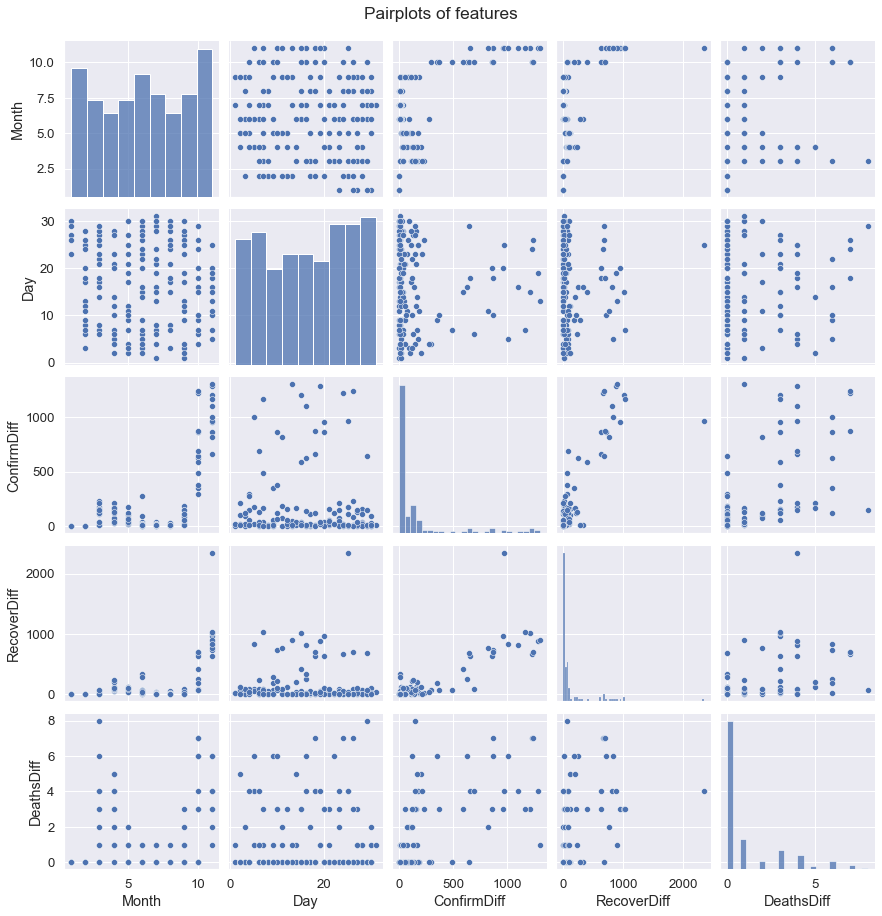

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(150))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Correlation

In [12]:
df.corr()

,Month,Day,ConfirmDiff,RecoverDiff,DeathsDiff
Month,1.000000,-0.098535,0.604269,0.545945,0.341420
Day,-0.098535,1.000000,0.002108,0.027499,0.035592
ConfirmDiff,0.604269,0.002108,1.000000,0.875959,0.641523
RecoverDiff,0.545945,0.027499,0.875959,1.000000,0.561145
DeathsDiff,0.341420,0.035592,0.641523,0.561145,1.000000


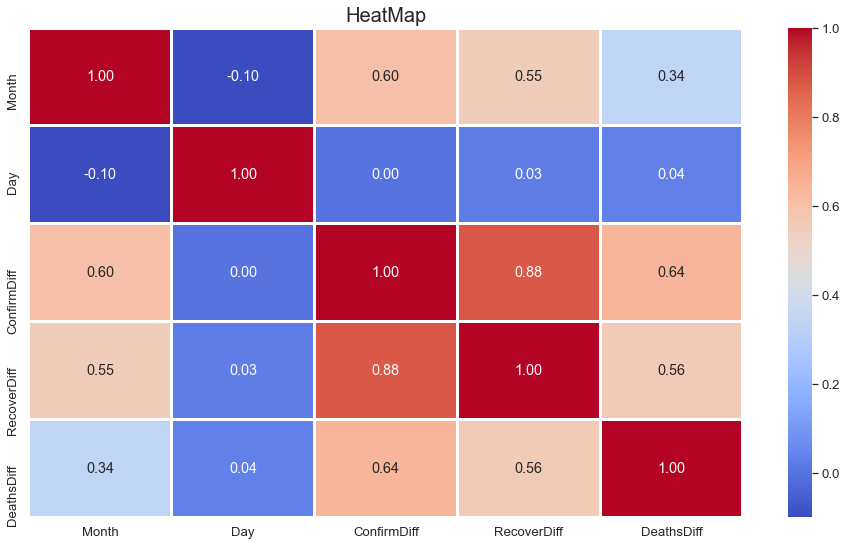

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("HeatMap", fontsize=20)
plt.show()

### Treat Duplicate Values

In [14]:
df.duplicated(keep='first').sum()

0

## Train Test Split

In [15]:
df2 = pd.read_csv("traincovid2.csv")

In [16]:
df2.head()

,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,ConfirmDiff,RecoverDiff,DeathsDiff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0


In [17]:
df2.shape

(309, 43)

In [18]:
X = df2.iloc[:,0:42]
y = df2.iloc[:,42]

In [19]:
X.values, y.values

(array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0., 1884.,  883.],
        [   0.,    0.,    0., ...,    0., 2188., 1673.],
        [   0.,    0.,    0., ...,    0.,  970., 2348.]]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  6.,  4.,  2.,  4.,  3.,
         3.,  1.,  8.,  2.,  6.,  2.,  5.,  3.,  4.,  4.,  1.,  1.,  2.,
         2.,  3.,  3.,  3.,  1.,  5.,  1.,  1.,  2.,  2.,  1.,  0.,  3.,
         1.,  2.,  1.,  2.,  0.,  1.,  1.,  0.,  2.,  1.,  0.,  2.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  1.,  

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((231, 42), (78, 42), (231,), (78,))

### Feature Scaling (If not using Batch Normalization)

In [22]:
#X_train

In [23]:
#scaler = StandardScaler()

In [24]:
#X_train_scaled = scaler.fit_transform(X_train)

In [25]:
#X_test_scaled = scaler.transform(X_test)

In [26]:
#X_train_scaled

In [27]:
#X_test_scaled

## Model Training

### Using DNN

In [28]:
model = Sequential()
model.add(Dense(units=100,activation='relu',input_dim=42))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(units=1,activation='linear'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4300      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________


In [30]:
checkpointcb = keras.callbacks.ModelCheckpoint("BestModelPartA.h5",save_best_only=True)

In [31]:
earlystoppingcb = keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [32]:
optimizer = Adam(learning_rate=0.00001)

In [33]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])

In [34]:
model_history = model.fit(X_train, y_train,epochs=800,
                          validation_split=0.2, verbose=2, callbacks=[checkpointcb,earlystoppingcb])

Epoch 1/800
6/6 - 0s - loss: 4119.8086 - mse: 4118.7930 - val_loss: 3451.2778 - val_mse: 3450.2622
Epoch 2/800
6/6 - 0s - loss: 3962.5627 - mse: 3961.5471 - val_loss: 3323.4192 - val_mse: 3322.4043
Epoch 3/800
6/6 - 0s - loss: 3806.2603 - mse: 3805.2449 - val_loss: 3202.3857 - val_mse: 3201.3711
Epoch 4/800
6/6 - 0s - loss: 3700.4407 - mse: 3699.4263 - val_loss: 3075.8352 - val_mse: 3074.8208
Epoch 5/800
6/6 - 0s - loss: 3551.0132 - mse: 3549.9985 - val_loss: 2962.4080 - val_mse: 2961.3943
Epoch 6/800
6/6 - 0s - loss: 3432.7051 - mse: 3431.6917 - val_loss: 2849.3926 - val_mse: 2848.3794
Epoch 7/800
6/6 - 0s - loss: 3305.7241 - mse: 3304.7112 - val_loss: 2742.2307 - val_mse: 2741.2178
Epoch 8/800
6/6 - 0s - loss: 3188.9211 - mse: 3187.9087 - val_loss: 2636.8179 - val_mse: 2635.8054
Epoch 9/800
6/6 - 0s - loss: 3069.7297 - mse: 3068.7170 - val_loss: 2535.2654 - val_mse: 2534.2534
Epoch 10/800
6/6 - 0s - loss: 2963.7168 - mse: 2962.7051 - val_loss: 2435.5625 - val_mse: 2434.5508
Epoch 11/

6/6 - 0s - loss: 147.4668 - mse: 146.4887 - val_loss: 103.8943 - val_mse: 102.9164
Epoch 86/800
6/6 - 0s - loss: 141.6649 - mse: 140.6872 - val_loss: 100.3266 - val_mse: 99.3491
Epoch 87/800
6/6 - 0s - loss: 135.3113 - mse: 134.3340 - val_loss: 97.2705 - val_mse: 96.2935
Epoch 88/800
6/6 - 0s - loss: 130.9016 - mse: 129.9247 - val_loss: 94.0389 - val_mse: 93.0623
Epoch 89/800
6/6 - 0s - loss: 125.8565 - mse: 124.8800 - val_loss: 91.1534 - val_mse: 90.1772
Epoch 90/800
6/6 - 0s - loss: 121.5391 - mse: 120.5631 - val_loss: 88.3310 - val_mse: 87.3553
Epoch 91/800
6/6 - 0s - loss: 116.4799 - mse: 115.5043 - val_loss: 85.8837 - val_mse: 84.9083
Epoch 92/800
6/6 - 0s - loss: 112.3725 - mse: 111.3973 - val_loss: 83.5742 - val_mse: 82.5993
Epoch 93/800
6/6 - 0s - loss: 107.8143 - mse: 106.8395 - val_loss: 81.5858 - val_mse: 80.6113
Epoch 94/800
6/6 - 0s - loss: 104.5672 - mse: 103.5929 - val_loss: 79.6035 - val_mse: 78.6294
Epoch 95/800
6/6 - 0s - loss: 101.3370 - mse: 100.3632 - val_loss: 77.

6/6 - 0s - loss: 16.7815 - mse: 15.8397 - val_loss: 24.6110 - val_mse: 23.6693
Epoch 174/800
6/6 - 0s - loss: 16.5176 - mse: 15.5761 - val_loss: 24.3182 - val_mse: 23.3770
Epoch 175/800
6/6 - 0s - loss: 16.2481 - mse: 15.3071 - val_loss: 24.0360 - val_mse: 23.0952
Epoch 176/800
6/6 - 0s - loss: 15.9864 - mse: 15.0458 - val_loss: 23.7409 - val_mse: 22.8004
Epoch 177/800
6/6 - 0s - loss: 15.7396 - mse: 14.7993 - val_loss: 23.4646 - val_mse: 22.5246
Epoch 178/800
6/6 - 0s - loss: 15.4865 - mse: 14.5466 - val_loss: 23.2440 - val_mse: 22.3043
Epoch 179/800
6/6 - 0s - loss: 15.2705 - mse: 14.3310 - val_loss: 22.9735 - val_mse: 22.0342
Epoch 180/800
6/6 - 0s - loss: 15.0056 - mse: 14.0665 - val_loss: 22.7504 - val_mse: 21.8116
Epoch 181/800
6/6 - 0s - loss: 14.7988 - mse: 13.8601 - val_loss: 22.4807 - val_mse: 21.5423
Epoch 182/800
6/6 - 0s - loss: 14.6133 - mse: 13.6750 - val_loss: 22.1834 - val_mse: 21.2453
Epoch 183/800
6/6 - 0s - loss: 14.3510 - mse: 13.4131 - val_loss: 21.9153 - val_mse:

Epoch 263/800
6/6 - 0s - loss: 6.9457 - mse: 6.0383 - val_loss: 11.6439 - val_mse: 10.7368
Epoch 264/800
6/6 - 0s - loss: 6.9152 - mse: 6.0083 - val_loss: 11.5565 - val_mse: 10.6498
Epoch 265/800
6/6 - 0s - loss: 6.8576 - mse: 5.9510 - val_loss: 11.4933 - val_mse: 10.5869
Epoch 266/800
6/6 - 0s - loss: 6.8173 - mse: 5.9110 - val_loss: 11.4411 - val_mse: 10.5351
Epoch 267/800
6/6 - 0s - loss: 6.7778 - mse: 5.8719 - val_loss: 11.3838 - val_mse: 10.4781
Epoch 268/800
6/6 - 0s - loss: 6.7460 - mse: 5.8405 - val_loss: 11.3052 - val_mse: 10.3999
Epoch 269/800
6/6 - 0s - loss: 6.7002 - mse: 5.7951 - val_loss: 11.2491 - val_mse: 10.3442
Epoch 270/800
6/6 - 0s - loss: 6.6573 - mse: 5.7525 - val_loss: 11.1928 - val_mse: 10.2883
Epoch 271/800
6/6 - 0s - loss: 6.6364 - mse: 5.7320 - val_loss: 11.1133 - val_mse: 10.2091
Epoch 272/800
6/6 - 0s - loss: 6.5937 - mse: 5.6897 - val_loss: 11.0719 - val_mse: 10.1681
Epoch 273/800
6/6 - 0s - loss: 6.5518 - mse: 5.6481 - val_loss: 11.0132 - val_mse: 10.1098

Epoch 355/800
6/6 - 0s - loss: 4.5647 - mse: 3.6902 - val_loss: 7.9010 - val_mse: 7.0267
Epoch 356/800
6/6 - 0s - loss: 4.5458 - mse: 3.6716 - val_loss: 7.8756 - val_mse: 7.0016
Epoch 357/800
6/6 - 0s - loss: 4.5296 - mse: 3.6558 - val_loss: 7.8495 - val_mse: 6.9759
Epoch 358/800
6/6 - 0s - loss: 4.5120 - mse: 3.6385 - val_loss: 7.8267 - val_mse: 6.9534
Epoch 359/800
6/6 - 0s - loss: 4.4929 - mse: 3.6197 - val_loss: 7.8023 - val_mse: 6.9293
Epoch 360/800
6/6 - 0s - loss: 4.4804 - mse: 3.6076 - val_loss: 7.7735 - val_mse: 6.9009
Epoch 361/800
6/6 - 0s - loss: 4.4736 - mse: 3.6012 - val_loss: 7.7458 - val_mse: 6.8735
Epoch 362/800
6/6 - 0s - loss: 4.4423 - mse: 3.5701 - val_loss: 7.7211 - val_mse: 6.8492
Epoch 363/800
6/6 - 0s - loss: 4.4322 - mse: 3.5605 - val_loss: 7.6983 - val_mse: 6.8268
Epoch 364/800
6/6 - 0s - loss: 4.4110 - mse: 3.5395 - val_loss: 7.6759 - val_mse: 6.8047
Epoch 365/800
6/6 - 0s - loss: 4.3957 - mse: 3.5246 - val_loss: 7.6554 - val_mse: 6.7845
Epoch 366/800
6/6 - 0

6/6 - 0s - loss: 3.4719 - mse: 2.6279 - val_loss: 6.1560 - val_mse: 5.3123
Epoch 448/800
6/6 - 0s - loss: 3.4664 - mse: 2.6227 - val_loss: 6.1505 - val_mse: 5.3070
Epoch 449/800
6/6 - 0s - loss: 3.4579 - mse: 2.6145 - val_loss: 6.1454 - val_mse: 5.3022
Epoch 450/800
6/6 - 0s - loss: 3.4489 - mse: 2.6058 - val_loss: 6.1358 - val_mse: 5.2930
Epoch 451/800
6/6 - 0s - loss: 3.4457 - mse: 2.6030 - val_loss: 6.1213 - val_mse: 5.2788
Epoch 452/800
6/6 - 0s - loss: 3.4364 - mse: 2.5940 - val_loss: 6.1076 - val_mse: 5.2654
Epoch 453/800
6/6 - 0s - loss: 3.4309 - mse: 2.5888 - val_loss: 6.0950 - val_mse: 5.2532
Epoch 454/800
6/6 - 0s - loss: 3.4237 - mse: 2.5819 - val_loss: 6.0884 - val_mse: 5.2469
Epoch 455/800
6/6 - 0s - loss: 3.4182 - mse: 2.5768 - val_loss: 6.0814 - val_mse: 5.2401
Epoch 456/800
6/6 - 0s - loss: 3.4123 - mse: 2.5712 - val_loss: 6.0711 - val_mse: 5.2302
Epoch 457/800
6/6 - 0s - loss: 3.4052 - mse: 2.5644 - val_loss: 6.0647 - val_mse: 5.2241
Epoch 458/800
6/6 - 0s - loss: 3.40

Epoch 540/800
6/6 - 0s - loss: 3.0947 - mse: 2.2794 - val_loss: 5.5102 - val_mse: 4.6951
Epoch 541/800
6/6 - 0s - loss: 3.0935 - mse: 2.2785 - val_loss: 5.5080 - val_mse: 4.6932
Epoch 542/800
6/6 - 0s - loss: 3.0918 - mse: 2.2771 - val_loss: 5.5097 - val_mse: 4.6952
Epoch 543/800
6/6 - 0s - loss: 3.0893 - mse: 2.2749 - val_loss: 5.5109 - val_mse: 4.6967
Epoch 544/800
6/6 - 0s - loss: 3.0871 - mse: 2.2730 - val_loss: 5.5072 - val_mse: 4.6933
Epoch 545/800
6/6 - 0s - loss: 3.0876 - mse: 2.2737 - val_loss: 5.4963 - val_mse: 4.6827
Epoch 546/800
6/6 - 0s - loss: 3.0840 - mse: 2.2705 - val_loss: 5.4914 - val_mse: 4.6780
Epoch 547/800
6/6 - 0s - loss: 3.0943 - mse: 2.2811 - val_loss: 5.5095 - val_mse: 4.6965
Epoch 548/800
6/6 - 0s - loss: 3.0842 - mse: 2.2713 - val_loss: 5.4856 - val_mse: 4.6728
Epoch 549/800
6/6 - 0s - loss: 3.0776 - mse: 2.2650 - val_loss: 5.4745 - val_mse: 4.6621
Epoch 550/800
6/6 - 0s - loss: 3.0747 - mse: 2.2624 - val_loss: 5.4673 - val_mse: 4.6551
Epoch 551/800
6/6 - 0

In [35]:
model_history.params

{'verbose': 2, 'epochs': 800, 'steps': 6}

In [36]:
model_history.history

{'loss': [4119.80859375,
  3962.562744140625,
  3806.26025390625,
  3700.440673828125,
  3551.01318359375,
  3432.705078125,
  3305.72412109375,
  3188.921142578125,
  3069.729736328125,
  2963.716796875,
  2840.614013671875,
  2735.95068359375,
  2642.163330078125,
  2539.379638671875,
  2451.151611328125,
  2356.887451171875,
  2261.309326171875,
  2184.13525390625,
  2093.637451171875,
  2016.6976318359375,
  1935.5194091796875,
  1860.634033203125,
  1792.700439453125,
  1715.9378662109375,
  1658.8048095703125,
  1589.8046875,
  1522.9521484375,
  1467.2261962890625,
  1412.1688232421875,
  1353.00439453125,
  1298.1153564453125,
  1246.225830078125,
  1200.517822265625,
  1149.657958984375,
  1104.1529541015625,
  1057.798828125,
  1016.7378540039062,
  974.6820068359375,
  935.048583984375,
  899.5614624023438,
  857.3394775390625,
  824.4473266601562,
  792.8396606445312,
  759.1878662109375,
  732.6757202148438,
  697.9213256835938,
  673.3490600585938,
  644.1419067382812,
  

In [37]:
hist = pd.DataFrame(model_history.history)
hist

,loss,mse,val_loss,val_mse
0,4119.808594,4118.792969,3451.277832,3450.262207
1,3962.562744,3961.547119,3323.419189,3322.404297
2,3806.260254,3805.244873,3202.385742,3201.371094
3,3700.440674,3699.426270,3075.835205,3074.820801
4,3551.013184,3549.998535,2962.407959,2961.394287
...,...,...,...,...
582,3.017624,2.214906,5.372094,4.569550
583,3.017066,2.214636,5.363765,4.561507
584,3.014844,2.212701,5.361718,4.559749
585,3.012782,2.210927,5.367266,4.565584


In [38]:
hist['epoch'] = model_history.epoch

In [39]:
hist

,loss,mse,val_loss,val_mse,epoch
0,4119.808594,4118.792969,3451.277832,3450.262207,0
1,3962.562744,3961.547119,3323.419189,3322.404297,1
2,3806.260254,3805.244873,3202.385742,3201.371094,2
3,3700.440674,3699.426270,3075.835205,3074.820801,3
4,3551.013184,3549.998535,2962.407959,2961.394287,4
...,...,...,...,...,...
582,3.017624,2.214906,5.372094,4.569550,582
583,3.017066,2.214636,5.363765,4.561507,583
584,3.014844,2.212701,5.361718,4.559749,584
585,3.012782,2.210927,5.367266,4.565584,585


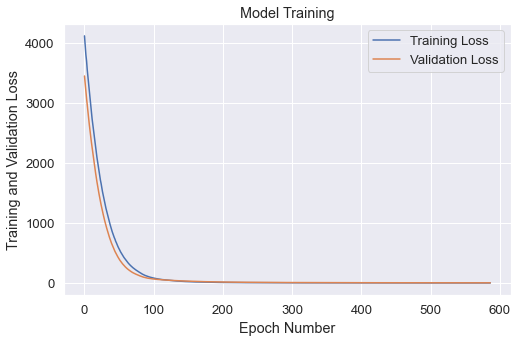

In [40]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Training")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

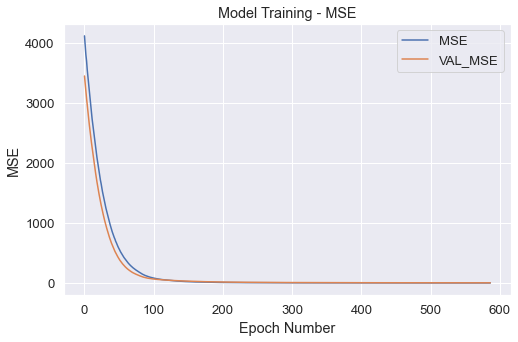

In [41]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title("Model Training - MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch Number")
plt.legend(['MSE','VAL_MSE'])
plt.show()

### Model Evaluation

In [42]:
model.get_weights()

[array([[-0.06692149, -0.11918116,  0.00647938, ..., -0.0463139 ,
          0.09368964, -0.16854094],
        [ 0.05740365,  0.00807465, -0.17234413, ...,  0.06566545,
         -0.16051328, -0.13977562],
        [ 0.03110347, -0.02175083,  0.02451196, ..., -0.11600856,
          0.18329461,  0.08509453],
        ...,
        [ 0.03880645,  0.09782134,  0.18210599, ...,  0.08798633,
         -0.16941778,  0.01249855],
        [ 0.11023546, -0.04211644,  0.15408164, ...,  0.09474277,
         -0.03555257,  0.06336047],
        [-0.15282373,  0.1216042 , -0.16169126, ...,  0.11059742,
          0.09820643, -0.07787107]], dtype=float32),
 array([-0.0050367 ,  0.0057361 , -0.00192996, -0.00214218,  0.00374088,
         0.00388337,  0.00567919, -0.00170535,  0.00070381, -0.00689378,
         0.00543956,  0.01581135,  0.00616075,  0.00193988,  0.00419267,
        -0.00331371, -0.00450264,  0.00560008,  0.01336006,  0.00784956,
         0.00106189, -0.00596037, -0.00286763,  0.00723396, -0.003

In [43]:
test_loss, test_mse = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 998us/step - loss: 3.1042 - mse: 2.3028


In [44]:
print("Test MSE: {}".format(test_mse))

Test MSE: 2.3028433322906494


### Model Prediction

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred[0:5]

array([[ 0.7172812 ],
       [ 0.06949318],
       [ 0.1189203 ],
       [-0.02114202],
       [ 0.09577706]], dtype=float32)

In [47]:
y_pred.round()[0:5]

array([[ 1.],
       [ 0.],
       [ 0.],
       [-0.],
       [ 0.]], dtype=float32)

In [48]:
y_test[0:5]

array([4., 0., 0., 0., 0.])

In [49]:
mse = mean_squared_error(y_test,y_pred.round())
mse

2.423076923076923

In [50]:
rmse = np.sqrt(mse)
rmse

1.5566235649883124

In [51]:
r2 = r2_score(y_test,y_pred.round())
r2

0.1907114624505929

In [52]:
n = len(X_test)
n

78

In [53]:
p = X_test.shape[1]
p

42

In [54]:
#Adjusted R2 Score
adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
adjr2

-0.7804347826086955

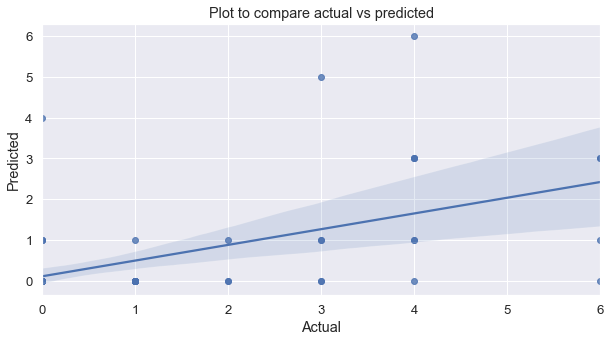

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred.round(), ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Save the Model

In [56]:
model.save("dnnPartA.h5")

### Cross Validation

Build a model (regression or classfier) first

In [57]:
def build_regressor():
    model = Sequential()
    model.add(Dense(units=100,activation='relu',input_dim=42))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='linear'))
    optimizer = Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])
    return model

In [58]:
model = KerasRegressor(build_fn=build_regressor, epochs=800)

In [59]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [60]:
cv = cross_val_score(estimator=model,X=X_train, y=y_train, cv=kfold, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.0s finished


In [61]:
cv

array([-6.45266533, -2.98656297, -3.08224034, -2.71152568, -4.56542969])

In [62]:
cv.mean()

-3.9596848011016847

In [63]:
cv.std()

1.4040409434972103

In [64]:
mse_mean = abs(cv.mean())
mse_mean

3.9596848011016847

In [65]:
rmse = np.sqrt(mse_mean)
rmse

1.9898956759342146

### Model Hyperparameter Tuning

### Create a regressor or classifier function

In [ ]:
def build_regressor(optimizer):
    model = Sequential()
    model.add(Dense(units=100,activation='relu',input_dim=42))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='linear'))
    optimizer = Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])
    return model

In [ ]:
model = KerasRegressor(build_fn=build_regressor)

In [ ]:
params = {'batch_size':[1,2,5],
          'epochs' : [100,200,300],
          'optimizer' : ['Adam', 'RMSprop', 'SGD']
         }

### Use RandomSearch CV

In [ ]:
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=10,
                                  scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,random_state=0)

In [ ]:
randomsearchcv = randomsearch.fit(X_train, y_train)

In [ ]:
randomsearchcv.best_params_

In [ ]:
randomsearchcv.best_score_

### Final Model

In [ ]:
model2 = Sequential()
model2.add(Dense(units=100,activation='relu',input_dim=42))
#model2.add(BatchNormalization())
#model2.add(Dropout(0.2))
model2.add(Dense(units=100,activation='relu',kernel_regularizer='l2'))
#model2.add(BatchNormalization())
#model2.add(Dropout(0.2))
model2.add(Dense(units=1,activation='linear'))

In [ ]:
model2.summary()

In [ ]:
checkpointcb = keras.callbacks.ModelCheckpoint("BestModelPartA.h5",save_best_only=True)

In [ ]:
earlystoppingcb = keras.callbacks.EarlyStopping(patience=10, verbose=1)

In [ ]:
optimizer = SGD(learning_rate=0.0001)

In [ ]:
model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mse"])

In [ ]:
model_history_2 = model2.fit(X_train, y_train,epochs=200,batch_size=2,
                          validation_split=0.2, verbose=2, callbacks=[checkpointcb,earlystoppingcb])

In [ ]:
model_history_2.params